In [17]:
import gym
import gym_sokoban
from gym_sokoban.envs import SokobanEnv
import matplotlib.pyplot as plt
%matplotlib inline

In [18]:
def render_state(env, mode="rgb_array"):
    """Renders the Sokoban environment as image and displays it."""
    image = env.render(mode)

    plt.figure(dpi=200) 
    plt.imshow(image)
    plt.axis('off')
    plt.show()

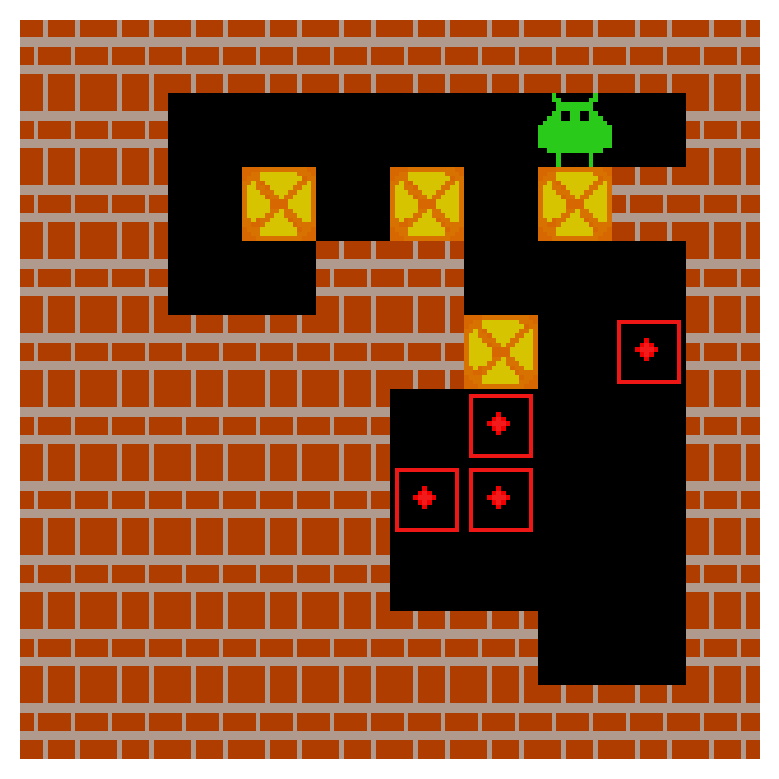

In [19]:
# Generating new room
env = SokobanEnv(dim_room=(10, 10), max_steps=40, num_boxes=4, num_gen_steps=None, reset=True)

render_state(env)

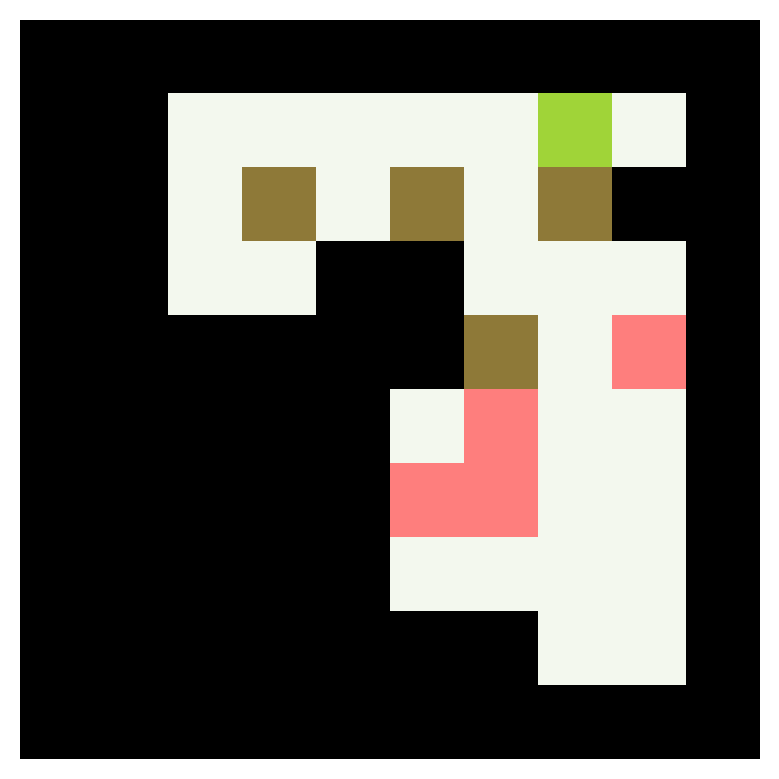

In [20]:
render_state(env, mode="tiny_rgb_array")

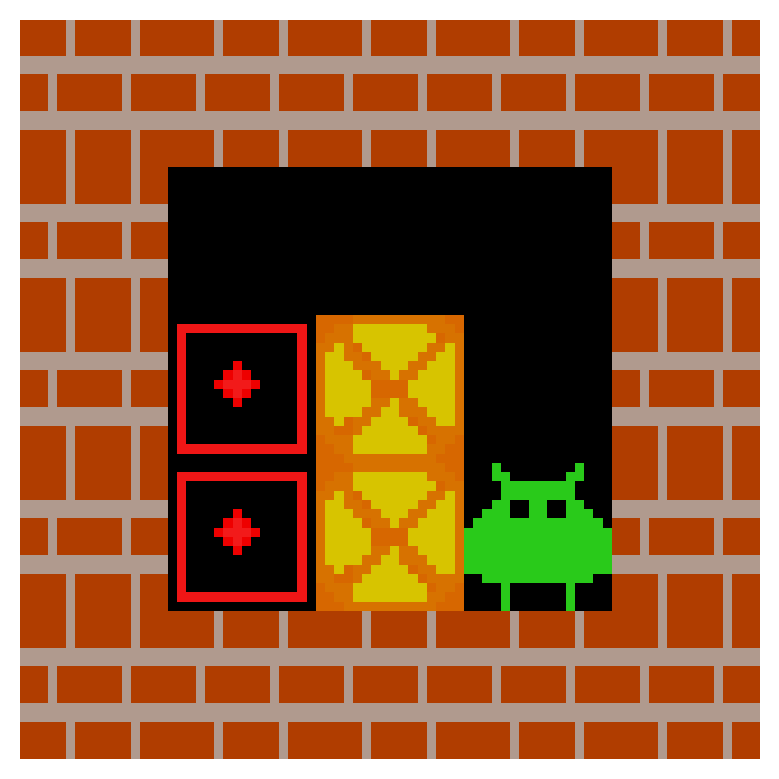

In [ ]:
import numpy as np

# For constant same enviroment the seed can be set:
env = SokobanEnv(dim_room=(10, 10), max_steps=40, num_boxes=4, num_gen_steps=None, reset=True)
env.seed(1)

# For a fully self defined map the reset method can be overwritten:
class SokobanEnvFixated(SokobanEnv):     
    def reset(self, second_player=False, render_mode='rgb_array'):

        self.room_fixed = np.array([[0, 0, 0, 0, 0],
                                    [0, 1, 1, 1, 0],
                                    [0, 2, 1, 1, 0],
                                    [0, 2, 1, 1, 0],
                                    [0, 0, 0, 0, 0]])
        self.room_state = np.array([[0, 0, 0, 0, 0],
                                    [0, 1, 1, 1, 0],
                                    [0, 2, 4, 1, 0],
                                    [0, 2, 4, 5, 0],
                                    [0, 0, 0, 0, 0]])
        self.box_mapping = {(2, 1): (2, 2), (3, 1): (3, 2)}

        self.player_position = np.argwhere(self.room_state == 5)[0]
        self.num_env_steps = 0
        self.reward_last = 0
        self.boxes_on_target = 0

        starting_observation = self.render(render_mode)
        return starting_observation
  
env = SokobanEnvFixated(dim_room=(5, 5), max_steps=40, num_boxes=2, num_gen_steps=None, reset=True)
render_state(env)